<a href="https://colab.research.google.com/github/jeffreygalle/MAT422/blob/main/HW41_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 4.2 Spectral Graph Bipartitioning

Objective: partition a graph into two subsets V1 and V2,so that the number of connecting nodes between the two is minimized. The edges are called the cuts and the cut between V1 and V2 is defined but the sum of weight of edges connecting nodes of V1 to nodes of V1.

The graph partition is represented by a partition vector, p, where each element p_i is assigned +1 if node i belongs to V1; -1 if to V2.

The objective function Q(V1, V2) balances the partition by using the weights of nodes in each subset. Objective function minimizes the sum of edge weights between subsets, it takes into account the weight distribution within each partition.



*   Generalized Partition Vector: The generalized partition vector, q, adjusts the **partition values** to achieve an optimal cut. The vector considers both the Laplacian matrix L and matrix W (node weights). It is computed based on eigenvalues, focus on the second smallest eigenvalue.
*   Spectral graph Bipartitioning uses eigenvalues of the Laplacian matrix to find an optimal balanced cut between two graph partitions.



Fiedler Vector: [ 0.51567943 -0.31056752 -0.54568839 -0.20511191  0.54568839]
Partition1: [0, 4]
Partition2: [1, 2, 3]


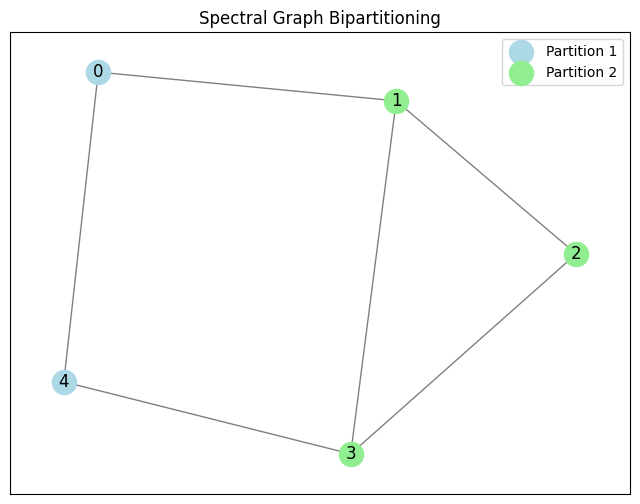

In [2]:
import networkx as nx
import numpy as np
from scipy.linalg import eigh  # For eigenvalue and eigenvector computation

# Small graph with some edges and weights
G = nx.Graph()
G = nx.Graph()
edges = [
    (0, 1, 1),
    (1, 2, 2),
    (2, 3, 1),
    (3, 4, 1),
    (4, 0, 2),
    (1, 3, 1)
]
G.add_weighted_edges_from(edges)
# Compute the Laplacian matrix of the graph, which encodes information about node connections
L = nx.laplacian_matrix(G).todense()
eigenvalues, eigenvectors = eigh(L)

# use the second smallest eigenvalue’s corresponding eigenvector to find optimal cut
fiedler_vector = eigenvectors[:, 1]

# Nodes with positive entries in the Fiedler vector go into one partition,
# and those with negative entries go into another
partition_1 = []
partition_2 = []
for i in range(len(fiedler_vector)):
    if fiedler_vector[i] >= 0:
        partition_1.append(i)
    else:
        partition_2.append(i)


# Display results
print("Fiedler Vector:", fiedler_vector)
print("Partition1:", partition_1)
print("Partition2:", partition_2)

# Visualize the partitions
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # Layout for visualization
plt.figure(figsize=(8, 6))

# Draw the nodes and edges, coloring nodes by partition
nx.draw_networkx_nodes(G, pos, nodelist=partition_1, node_color="lightblue", label="Partition 1")
nx.draw_networkx_nodes(G, pos, nodelist=partition_2, node_color="lightgreen", label="Partition 2")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.legend()
plt.title("Spectral Graph Bipartitioning")
plt.show()
